In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True) 
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns

import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)


from sklearn import preprocessing

# Data Import

In [2]:
df = pd.read_csv('insurance_fraud.csv')
# looking at the dataset
df.head()

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,Deductible,...,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,FraudFound_P,PolicyNumber,Year,RegistrationDate
0,Jul,Honda,Urban,Sep,Male,Single,Policy Holder,Sedan,96494,400.0,...,No,No,External,no change,1 vehicle,All Perils,1.0,509343533,2023,2023-01-05 00:01:01.000001
1,Jul,Honda,Rural,Jan,Male,Married,Policy Holder,Sport,89807,400.0,...,No,No,External,no change,1 vehicle,Collision,1.0,600000326,2023,2020-11-09 00:01:01.000001
2,Jul,Honda,Urban,Aug,Male,Married,Policy Holder,Sedan,25517,400.0,...,No,No,External,no change,1 vehicle,Collision,1.0,935545676,2023,2016-02-24 00:01:01.000001
3,Nov,Honda,Urban,Jan,Male,Single,Policy Holder,Sport,70903,400.0,...,No,No,External,no change,1 vehicle,Collision,1.0,620550528,2023,2017-04-30 00:01:01.000001
4,Nov,Toyota,Urban,Jan,Male,Married,Policy Holder,Sedan,28016,400.0,...,No,No,External,no change,1 vehicle,Collision,1.0,795966429,2023,2017-05-21 00:01:01.000001


In [3]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 19 categorical variables

The categorical variables are : ['Month', 'Make', 'AccidentArea', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'VehicleCategory', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy', 'RegistrationDate']


In [4]:
df[categorical].isnull().sum()


Month                     0
Make                     97
AccidentArea              0
MonthClaimed              0
Sex                      96
MaritalStatus             0
Fault                     0
VehicleCategory           0
Days_Policy_Accident      0
Days_Policy_Claim         0
PastNumberOfClaims        0
AgeOfPolicyHolder         0
PoliceReportFiled       101
WitnessPresent          107
AgentType                 0
AddressChange_Claim       0
NumberOfCars              0
BasePolicy                0
RegistrationDate          0
dtype: int64

In [5]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

Make                  97
Sex                   96
PoliceReportFiled    101
WitnessPresent       107
dtype: int64


In [6]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

Month
Mar    1950
May    1892
Jan    1857
Jun    1808
Oct    1706
Apr    1698
Feb    1695
Sep    1690
Aug    1606
Dec    1594
Jul    1470
Nov    1370
Name: count, dtype: int64
Make
Pontiac      5241
Toyota       4282
Honda        3772
Mazda        2899
Chevrolet    2069
Accura        757
Ford          495
VW            288
Saab          116
Dodge         109
Mercury        85
Saturn         60
Nissan         30
BMW            18
Jaguar          6
Porsche         5
Mercedes        4
Ferrari         2
Lexus           1
Name: count, dtype: int64
AccidentArea
Urban    18493
Rural     1843
Name: count, dtype: int64
MonthClaimed
May    2049
Jan    1952
Mar    1866
Oct    1771
Jun    1760
Apr    1687
Feb    1684
Sep    1671
Aug    1648
Nov    1472
Jul    1438
Dec    1338
Name: count, dtype: int64
Sex
Male      14640
Female     5399
MALE        139
FEMALE       62
Name: count, dtype: int64
MaritalStatus
Married     14322
Single       5903
Divorced       76
Widow          35
Name: count, dtype:

In [7]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Month  contains  12  labels
Make  contains  20  labels
AccidentArea  contains  2  labels
MonthClaimed  contains  12  labels
Sex  contains  5  labels
MaritalStatus  contains  4  labels
Fault  contains  2  labels
VehicleCategory  contains  3  labels
Days_Policy_Accident  contains  5  labels
Days_Policy_Claim  contains  4  labels
PastNumberOfClaims  contains  4  labels
AgeOfPolicyHolder  contains  2  labels
PoliceReportFiled  contains  3  labels
WitnessPresent  contains  3  labels
AgentType  contains  2  labels
AddressChange_Claim  contains  5  labels
NumberOfCars  contains  5  labels
BasePolicy  contains  3  labels
RegistrationDate  contains  2186  labels


In [8]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['VehiclePrice', 'Deductible', 'DriverRating', 'FraudFound_P', 'PolicyNumber', 'Year']


In [9]:
df[numerical].head()


,VehiclePrice,Deductible,DriverRating,FraudFound_P,PolicyNumber,Year
0,96494,400.0,1.0,1.0,509343533,2023
1,89807,400.0,4.0,1.0,600000326,2023
2,25517,400.0,-2.0,1.0,935545676,2023
3,70903,400.0,3.0,1.0,620550528,2023
4,28016,400.0,2.0,1.0,795966429,2023


# Data Initial Exploration

In [10]:
df.shape

(20336, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20336 entries, 0 to 20335
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 20336 non-null  object 
 1   Make                  20239 non-null  object 
 2   AccidentArea          20336 non-null  object 
 3   MonthClaimed          20336 non-null  object 
 4   Sex                   20240 non-null  object 
 5   MaritalStatus         20336 non-null  object 
 6   Fault                 20336 non-null  object 
 7   VehicleCategory       20336 non-null  object 
 8   VehiclePrice          20336 non-null  int64  
 9   Deductible            20225 non-null  float64
 10  DriverRating          20229 non-null  float64
 11  Days_Policy_Accident  20336 non-null  object 
 12  Days_Policy_Claim     20336 non-null  object 
 13  PastNumberOfClaims    20336 non-null  object 
 14  AgeOfPolicyHolder     20336 non-null  object 
 15  PoliceReportFiled  

In [12]:
df.columns.tolist()

['Month',
 'Make',
 'AccidentArea',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'VehicleCategory',
 'VehiclePrice',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy',
 'FraudFound_P',
 'PolicyNumber',
 'Year',
 'RegistrationDate']

In [13]:
df.head(5)

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,Deductible,...,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,FraudFound_P,PolicyNumber,Year,RegistrationDate
0,Jul,Honda,Urban,Sep,Male,Single,Policy Holder,Sedan,96494,400.0,...,No,No,External,no change,1 vehicle,All Perils,1.0,509343533,2023,2023-01-05 00:01:01.000001
1,Jul,Honda,Rural,Jan,Male,Married,Policy Holder,Sport,89807,400.0,...,No,No,External,no change,1 vehicle,Collision,1.0,600000326,2023,2020-11-09 00:01:01.000001
2,Jul,Honda,Urban,Aug,Male,Married,Policy Holder,Sedan,25517,400.0,...,No,No,External,no change,1 vehicle,Collision,1.0,935545676,2023,2016-02-24 00:01:01.000001
3,Nov,Honda,Urban,Jan,Male,Single,Policy Holder,Sport,70903,400.0,...,No,No,External,no change,1 vehicle,Collision,1.0,620550528,2023,2017-04-30 00:01:01.000001
4,Nov,Toyota,Urban,Jan,Male,Married,Policy Holder,Sedan,28016,400.0,...,No,No,External,no change,1 vehicle,Collision,1.0,795966429,2023,2017-05-21 00:01:01.000001


In [14]:
df.describe()
# missing values in numerical features: ['Deductible','DriverRating','FraudFound_P']

,VehiclePrice,Deductible,DriverRating,FraudFound_P,PolicyNumber,Year
count,20336.000000,20225.000000,20229.000000,20248.000000,2.033600e+04,20336.0
mean,35233.225511,408.463634,2.447180,0.285905,5.488153e+08,2023.0
std,22522.581562,44.623858,1.113022,0.451855,2.599539e+08,0.0
min,7.000000,300.000000,-2.000000,0.000000,1.000077e+08,2023.0
25%,22956.500000,400.000000,1.000000,0.000000,3.237099e+08,2023.0
50%,27232.500000,400.000000,2.000000,0.000000,5.474015e+08,2023.0
75%,35886.250000,400.000000,3.000000,1.000000,7.758956e+08,2023.0
max,414638.000000,700.000000,4.000000,1.000000,9.999889e+08,2023.0


In [15]:
df[['Month', 'Make', 'AccidentArea', 'MonthClaimed', 'Sex', 'MaritalStatus',
       'Fault', 'VehicleCategory','Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy','RegistrationDate']].describe()

# missing values in categorical features: ['Make','Sex','PoliceReportFiled','WitnessPresent']

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Fault,VehicleCategory,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,RegistrationDate
count,20336,20239,20336,20336,20240,20336,20336,20336,20336,20336,20336,20336,20235,20229,20336,20336,20336,20336,20336
unique,12,19,2,12,4,4,2,3,5,4,4,2,2,2,2,5,5,3,2186
top,Mar,Pontiac,Urban,May,Male,Married,Policy Holder,Sedan,more than 30,more than 30,2 to 4,over 25,No,No,External,no change,1 vehicle,Collision,2018-01-01 00:01:01.000001
freq,1950,5241,18493,2049,14640,14322,15963,14129,20163,20258,7150,19682,19808,20142,20094,18945,19188,8323,43


In [16]:
from ydata_profiling import ProfileReport

# Profile the data
profile = ProfileReport(df, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Here we see hign collelations between the following columns:

VehicleCategory and BasePolicy
Deductible and Address_Change_Claim We need to kep it in mind before model training to exclude multicollinearity.

Here we see hign collelations between the following columns:

VehicleCategory and BasePolicy
Deductible and Address_Change_Claim We need to kep it in mind before model training to exclude multicollinearity.

In [ ]:
df['DriverRating'].value_counts()

DriverRating
 1.0    5407
 3.0    5233
 2.0    4976
 4.0    4612
-2.0       1
Name: count, dtype: int64

In [ ]:
# Replacing values -2 with 2 in the DriverRating column
df['DriverRating'] = df['DriverRating'].replace(-2, 2)

In [20]:
# Convert all values in the 'Sex' column to lowercase lowercase
df['Sex'] = df['Sex'].str.lower()

# Replace all variant values with two standardized ones
df['Sex'].replace({'male': 'Male', 'female': 'Female'}, inplace=True)

# Check unique values after correction
print(df['Sex'].value_counts())

Sex
Male      14779
Female     5461
Name: count, dtype: int64


In [21]:
df.drop_duplicates(keep='first', inplace=True)

In [22]:
df.Deductible.value_counts()

Deductible
400.0    19245
500.0      512
700.0      405
300.0        9
333.0        1
377.0        1
324.0        1
322.0        1
320.0        1
311.0        1
380.0        1
310.0        1
321.0        1
354.0        1
391.0        1
379.0        1
355.0        1
Name: count, dtype: int64

In [23]:
df['Deductible'] = df['Deductible'].apply(lambda x: 300 if (x < 350 and x>=300) else x)
df['Deductible'] = df['Deductible'].apply(lambda x: 400 if (x >= 350 and x<400) else x)

In [24]:
df.Deductible.value_counts()

Deductible
400.0    19251
500.0      512
700.0      405
300.0       16
Name: count, dtype: int64

## Missing Values Management

In [25]:
# Dropping the missing or null values
df.isnull().sum()

Month                     0
Make                     97
AccidentArea              0
MonthClaimed              0
Sex                      95
MaritalStatus             0
Fault                     0
VehicleCategory           0
VehiclePrice              0
Deductible              111
DriverRating            107
Days_Policy_Accident      0
Days_Policy_Claim         0
PastNumberOfClaims        0
AgeOfPolicyHolder         0
PoliceReportFiled       101
WitnessPresent          106
AgentType                 0
AddressChange_Claim       0
NumberOfCars              0
BasePolicy                0
FraudFound_P             88
PolicyNumber              0
Year                      0
RegistrationDate          0
dtype: int64

In [26]:
# Deleting Rows without FraudFound_P values
df.dropna(subset=['FraudFound_P'], inplace=True)
df.head()

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,Deductible,...,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,FraudFound_P,PolicyNumber,Year,RegistrationDate
0,Jul,Honda,Urban,Sep,Male,Single,Policy Holder,Sedan,96494,400.0,...,No,No,External,no change,1 vehicle,All Perils,1.0,509343533,2023,2023-01-05 00:01:01.000001
1,Jul,Honda,Rural,Jan,Male,Married,Policy Holder,Sport,89807,400.0,...,No,No,External,no change,1 vehicle,Collision,1.0,600000326,2023,2020-11-09 00:01:01.000001
2,Jul,Honda,Urban,Aug,Male,Married,Policy Holder,Sedan,25517,400.0,...,No,No,External,no change,1 vehicle,Collision,1.0,935545676,2023,2016-02-24 00:01:01.000001
3,Nov,Honda,Urban,Jan,Male,Single,Policy Holder,Sport,70903,400.0,...,No,No,External,no change,1 vehicle,Collision,1.0,620550528,2023,2017-04-30 00:01:01.000001
4,Nov,Toyota,Urban,Jan,Male,Married,Policy Holder,Sedan,28016,400.0,...,No,No,External,no change,1 vehicle,Collision,1.0,795966429,2023,2017-05-21 00:01:01.000001


In [27]:
from sklearn.impute import SimpleImputer
# lets instead define the following strategies for missing values - most_frequent for categorical and median for numerical
# Define strategies for imputation based on data type
numeric_strategy = 'median'
categorical_strategy = 'most_frequent'

# Initialize SimpleImputer for numeric and categorical columns
numeric_imputer = SimpleImputer(strategy=numeric_strategy)
categorical_imputer = SimpleImputer(strategy=categorical_strategy)

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numeric columns
imputed_numeric = numeric_imputer.fit_transform(df[numeric_cols])
imputed_df_numeric = pd.DataFrame(imputed_numeric, columns=numeric_cols)

# Impute missing values for categorical columns
imputed_categorical = categorical_imputer.fit_transform(df[categorical_cols])
imputed_df_categorical = pd.DataFrame(imputed_categorical, columns=categorical_cols)

# Concatenate numeric and categorical columns
df = pd.concat([imputed_df_numeric, imputed_df_categorical], axis=1)

# Display imputed DataFrame
print("Imputed DataFrame:")
display(df)
print(df.info())

Imputed DataFrame:


,VehiclePrice,Deductible,DriverRating,FraudFound_P,PolicyNumber,Year,Month,Make,AccidentArea,MonthClaimed,...,Days_Policy_Claim,PastNumberOfClaims,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,RegistrationDate
0,96494.0,400.0,1.0,1.0,509343533.0,2023.0,Jul,Honda,Urban,Sep,...,more than 30,none,25 and under,No,No,External,no change,1 vehicle,All Perils,2023-01-05 00:01:01.000001
1,89807.0,400.0,4.0,1.0,600000326.0,2023.0,Jul,Honda,Rural,Jan,...,more than 30,none,over 25,No,No,External,no change,1 vehicle,Collision,2020-11-09 00:01:01.000001
2,25517.0,400.0,2.0,1.0,935545676.0,2023.0,Jul,Honda,Urban,Aug,...,more than 30,none,over 25,No,No,External,no change,1 vehicle,Collision,2016-02-24 00:01:01.000001
3,70903.0,400.0,3.0,1.0,620550528.0,2023.0,Nov,Honda,Urban,Jan,...,more than 30,none,over 25,No,No,External,no change,1 vehicle,Collision,2017-04-30 00:01:01.000001
4,28016.0,400.0,2.0,1.0,795966429.0,2023.0,Nov,Toyota,Urban,Jan,...,more than 30,1,over 25,No,No,External,no change,1 vehicle,Collision,2017-05-21 00:01:01.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20202,26454.0,400.0,1.0,1.0,231758542.0,2023.0,Jan,Honda,Urban,Feb,...,more than 30,1,over 25,No,No,External,no change,1 vehicle,All Perils,2017-11-08 00:01:01.000001
20203,28341.0,400.0,3.0,1.0,580609294.0,2023.0,May,Chevrolet,Urban,May,...,more than 30,none,over 25,No,No,External,no change,1 vehicle,Collision,2018-12-12 00:01:01.000001
20204,34145.0,400.0,3.0,1.0,326323473.0,2023.0,Apr,Honda,Urban,Apr,...,more than 30,1,over 25,No,No,External,no change,1 vehicle,Collision,2016-12-07 00:01:01.000001
20205,35454.0,400.0,1.0,1.0,882280414.0,2023.0,Jul,Chevrolet,Urban,Jul,...,more than 30,1,over 25,No,No,External,no change,1 vehicle,Collision,2017-05-28 00:01:01.000001


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20207 entries, 0 to 20206
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VehiclePrice          20207 non-null  float64
 1   Deductible            20207 non-null  float64
 2   DriverRating          20207 non-null  float64
 3   FraudFound_P          20207 non-null  float64
 4   PolicyNumber          20207 non-null  float64
 5   Year                  20207 non-null  float64
 6   Month                 20207 non-null  object 
 7   Make                  20207 non-null  object 
 8   AccidentArea          20207 non-null  object 
 9   MonthClaimed          20207 non-null  object 
 10  Sex                   20207 non-null  object 
 11  MaritalStatus         20207 non-null  object 
 12  Fault                 20207 non-null  object 
 13  VehicleCategory       20207 non-null  object 
 14  Days_Policy_Accident  20207 non-null  object 
 15  Days_Policy_Claim  

In [28]:
#Checking Nulls
df.isnull().sum()

VehiclePrice            0
Deductible              0
DriverRating            0
FraudFound_P            0
PolicyNumber            0
Year                    0
Month                   0
Make                    0
AccidentArea            0
MonthClaimed            0
Sex                     0
MaritalStatus           0
Fault                   0
VehicleCategory         0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
AddressChange_Claim     0
NumberOfCars            0
BasePolicy              0
RegistrationDate        0
dtype: int64

# Feature Engeneering

In [29]:
#adding new feature base on registration date
display(df[['Year','MonthClaimed','RegistrationDate']])
df['Year'] = df['Year'].astype(int)
df['Year'] = df['Year'].astype(str)
df['DayClaimed'] = '01'
df['DateClaimed'] = df[['DayClaimed','MonthClaimed','Year']].agg('-'.join, axis=1)
df['DaysFromRegistration'] = pd.to_datetime(df['DateClaimed'],format="%d-%b-%Y") - pd.to_datetime(df['RegistrationDate'])
df['MonthsFromRegistration']= np.floor(df['DaysFromRegistration'] / np.timedelta64(1, 'M'))
df = df.drop(columns=['DaysFromRegistration','DayClaimed','DateClaimed'])
display(df['MonthsFromRegistration'].describe())

,Year,MonthClaimed,RegistrationDate
0,2023.0,Sep,2023-01-05 00:01:01.000001
1,2023.0,Jan,2020-11-09 00:01:01.000001
2,2023.0,Aug,2016-02-24 00:01:01.000001
3,2023.0,Jan,2017-04-30 00:01:01.000001
4,2023.0,Jan,2017-05-21 00:01:01.000001
...,...,...,...
20202,2023.0,Feb,2017-11-08 00:01:01.000001
20203,2023.0,May,2018-12-12 00:01:01.000001
20204,2023.0,Apr,2016-12-07 00:01:01.000001
20205,2023.0,Jul,2017-05-28 00:01:01.000001


count    20207.000000
mean        63.801306
std         23.758622
min        -12.000000
25%         56.000000
50%         67.000000
75%         75.000000
max       2342.000000
Name: MonthsFromRegistration, dtype: float64

In [30]:
df['MonthsFromRegistration'] = np.where(df['MonthsFromRegistration'] < 0, df[df['MonthsFromRegistration'] >= 0]['MonthsFromRegistration'].median(),df['MonthsFromRegistration'])
display(df['MonthsFromRegistration'].describe())

count    20207.000000
mean        65.302469
std         21.516231
min          0.000000
25%         57.000000
50%         67.000000
75%         75.000000
max       2342.000000
Name: MonthsFromRegistration, dtype: float64

In [31]:
df['MonthsFromRegistration'] = df['MonthsFromRegistration'].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20207 entries, 0 to 20206
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehiclePrice            20207 non-null  float64
 1   Deductible              20207 non-null  float64
 2   DriverRating            20207 non-null  float64
 3   FraudFound_P            20207 non-null  float64
 4   PolicyNumber            20207 non-null  float64
 5   Year                    20207 non-null  object 
 6   Month                   20207 non-null  object 
 7   Make                    20207 non-null  object 
 8   AccidentArea            20207 non-null  object 
 9   MonthClaimed            20207 non-null  object 
 10  Sex                     20207 non-null  object 
 11  MaritalStatus           20207 non-null  object 
 12  Fault                   20207 non-null  object 
 13  VehicleCategory         20207 non-null  object 
 14  Days_Policy_Accident    20207 non-null

# Dropping totally unuseful columns

In [32]:
#dropping totally unuseful columns
df = df.drop(columns=['Year','PolicyNumber', 'Month', 'MonthClaimed','RegistrationDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20207 entries, 0 to 20206
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehiclePrice            20207 non-null  float64
 1   Deductible              20207 non-null  float64
 2   DriverRating            20207 non-null  float64
 3   FraudFound_P            20207 non-null  float64
 4   Make                    20207 non-null  object 
 5   AccidentArea            20207 non-null  object 
 6   Sex                     20207 non-null  object 
 7   MaritalStatus           20207 non-null  object 
 8   Fault                   20207 non-null  object 
 9   VehicleCategory         20207 non-null  object 
 10  Days_Policy_Accident    20207 non-null  object 
 11  Days_Policy_Claim       20207 non-null  object 
 12  PastNumberOfClaims      20207 non-null  object 
 13  AgeOfPolicyHolder       20207 non-null  object 
 14  PoliceReportFiled       20207 non-null

# Data Exploration & Understanding and feature selection

In [35]:
df_crosstab = pd.crosstab(df['FraudFound_P'], df['WitnessPresent'], margins = False)
df_crosstab

WitnessPresent,No,Yes
FraudFound_P,,
0.0,14347,83
1.0,5774,3


In [36]:
df_crosstab = pd.crosstab(df['FraudFound_P'], df['PoliceReportFiled'], margins = False)
df_crosstab

PoliceReportFiled,No,Yes
FraudFound_P,,
0.0,14019,411
1.0,5762,15


In [37]:
df_crosstab = pd.crosstab(df['FraudFound_P'], df['Sex'], margins = False)
df_crosstab

Sex,Female,Male
FraudFound_P,,
0.0,5156,9274
1.0,265,5512


In [38]:
df_crosstab = pd.crosstab(df['FraudFound_P'], df['AddressChange_Claim'], margins = False)
df_crosstab

AddressChange_Claim,1 year,2 to 3 years,4 to 8 years,no change,under 6 months
FraudFound_P,,,,,
0.0,158,240,596,13435,1
1.0,11,303,72,5388,3


In [39]:
df_crosstab = pd.crosstab(df['FraudFound_P'], df['DriverRating'], margins = False)
df_crosstab

DriverRating,1.0,2.0,3.0,4.0
FraudFound_P,,,,
0.0,3682,3627,3605,3516
1.0,1693,1429,1594,1061


In [40]:
df.head()

,VehiclePrice,Deductible,DriverRating,FraudFound_P,Make,AccidentArea,Sex,MaritalStatus,Fault,VehicleCategory,...,Days_Policy_Claim,PastNumberOfClaims,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,MonthsFromRegistration
0,96494.0,400.0,1.0,1.0,Honda,Urban,Male,Single,Policy Holder,Sedan,...,more than 30,none,25 and under,No,No,External,no change,1 vehicle,All Perils,7
1,89807.0,400.0,4.0,1.0,Honda,Rural,Male,Married,Policy Holder,Sport,...,more than 30,none,over 25,No,No,External,no change,1 vehicle,Collision,25
2,25517.0,400.0,2.0,1.0,Honda,Urban,Male,Married,Policy Holder,Sedan,...,more than 30,none,over 25,No,No,External,no change,1 vehicle,Collision,87
3,70903.0,400.0,3.0,1.0,Honda,Urban,Male,Single,Policy Holder,Sport,...,more than 30,none,over 25,No,No,External,no change,1 vehicle,Collision,66
4,28016.0,400.0,2.0,1.0,Toyota,Urban,Male,Married,Policy Holder,Sedan,...,more than 30,1,over 25,No,No,External,no change,1 vehicle,Collision,66


In [41]:
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex', drop_first=False, dtype=int)
df.head()

,VehiclePrice,Deductible,DriverRating,FraudFound_P,Make,AccidentArea,MaritalStatus,Fault,VehicleCategory,Days_Policy_Accident,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,MonthsFromRegistration,Sex_Female,Sex_Male
0,96494.0,400.0,1.0,1.0,Honda,Urban,Single,Policy Holder,Sedan,more than 30,...,25 and under,No,No,External,no change,1 vehicle,All Perils,7,0,1
1,89807.0,400.0,4.0,1.0,Honda,Rural,Married,Policy Holder,Sport,more than 30,...,over 25,No,No,External,no change,1 vehicle,Collision,25,0,1
2,25517.0,400.0,2.0,1.0,Honda,Urban,Married,Policy Holder,Sedan,more than 30,...,over 25,No,No,External,no change,1 vehicle,Collision,87,0,1
3,70903.0,400.0,3.0,1.0,Honda,Urban,Single,Policy Holder,Sport,more than 30,...,over 25,No,No,External,no change,1 vehicle,Collision,66,0,1
4,28016.0,400.0,2.0,1.0,Toyota,Urban,Married,Policy Holder,Sedan,more than 30,...,over 25,No,No,External,no change,1 vehicle,Collision,66,0,1


In [42]:
# Application for multiple columns
cols_to_encode = ['Days_Policy_Accident','Days_Policy_Claim',"Make","AccidentArea","MaritalStatus", "Fault","VehicleCategory","PoliceReportFiled","WitnessPresent",'AgentType','PastNumberOfClaims','AgeOfPolicyHolder','AddressChange_Claim','NumberOfCars','BasePolicy' ]
df[cols_to_encode] = df[cols_to_encode].astype("category").apply(lambda x: x.cat.codes)

df.head()

,VehiclePrice,Deductible,DriverRating,FraudFound_P,Make,AccidentArea,MaritalStatus,Fault,VehicleCategory,Days_Policy_Accident,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,MonthsFromRegistration,Sex_Female,Sex_Male
0,96494.0,400.0,1.0,1.0,6,1,2,0,0,3,...,0,0,0,0,3,0,0,7,0,1
1,89807.0,400.0,4.0,1.0,6,0,1,0,1,3,...,1,0,0,0,3,0,1,25,0,1
2,25517.0,400.0,2.0,1.0,6,1,1,0,0,3,...,1,0,0,0,3,0,1,87,0,1
3,70903.0,400.0,3.0,1.0,6,1,2,0,1,3,...,1,0,0,0,3,0,1,66,0,1
4,28016.0,400.0,2.0,1.0,17,1,1,0,0,3,...,1,0,0,0,3,0,1,66,0,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20207 entries, 0 to 20206
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehiclePrice            20207 non-null  float64
 1   Deductible              20207 non-null  float64
 2   DriverRating            20207 non-null  float64
 3   FraudFound_P            20207 non-null  float64
 4   Make                    20207 non-null  int8   
 5   AccidentArea            20207 non-null  int8   
 6   MaritalStatus           20207 non-null  int8   
 7   Fault                   20207 non-null  int8   
 8   VehicleCategory         20207 non-null  int8   
 9   Days_Policy_Accident    20207 non-null  int8   
 10  Days_Policy_Claim       20207 non-null  int8   
 11  PastNumberOfClaims      20207 non-null  int8   
 12  AgeOfPolicyHolder       20207 non-null  int8   
 13  PoliceReportFiled       20207 non-null  int8   
 14  WitnessPresent          20207 non-null

In [44]:
df.Days_Policy_Accident

0        3
1        3
2        3
3        3
4        3
        ..
20202    3
20203    3
20204    3
20205    3
20206    3
Name: Days_Policy_Accident, Length: 20207, dtype: int8

# Feature Engineering

In [45]:
df.head()

,VehiclePrice,Deductible,DriverRating,FraudFound_P,Make,AccidentArea,MaritalStatus,Fault,VehicleCategory,Days_Policy_Accident,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,MonthsFromRegistration,Sex_Female,Sex_Male
0,96494.0,400.0,1.0,1.0,6,1,2,0,0,3,...,0,0,0,0,3,0,0,7,0,1
1,89807.0,400.0,4.0,1.0,6,0,1,0,1,3,...,1,0,0,0,3,0,1,25,0,1
2,25517.0,400.0,2.0,1.0,6,1,1,0,0,3,...,1,0,0,0,3,0,1,87,0,1
3,70903.0,400.0,3.0,1.0,6,1,2,0,1,3,...,1,0,0,0,3,0,1,66,0,1
4,28016.0,400.0,2.0,1.0,17,1,1,0,0,3,...,1,0,0,0,3,0,1,66,0,1


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_features = df.copy()
col_names = ['VehiclePrice', 'Deductible','MonthsFromRegistration']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
df = scaled_features
df.head()


,VehiclePrice,Deductible,DriverRating,FraudFound_P,Make,AccidentArea,MaritalStatus,Fault,VehicleCategory,Days_Policy_Accident,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,MonthsFromRegistration,Sex_Female,Sex_Male
0,2.739273,-0.189158,1.0,1.0,6,1,2,0,0,3,...,0,0,0,0,3,0,0,-2.709764,0,1
1,2.440360,-0.189158,4.0,1.0,6,0,1,0,1,3,...,1,0,0,0,3,0,1,-1.873166,0,1
2,-0.433445,-0.189158,2.0,1.0,6,1,1,0,0,3,...,1,0,0,0,3,0,1,1.008451,0,1
3,1.595339,-0.189158,3.0,1.0,6,1,2,0,1,3,...,1,0,0,0,3,0,1,0.032420,0,1
4,-0.321738,-0.189158,2.0,1.0,17,1,1,0,0,3,...,1,0,0,0,3,0,1,0.032420,0,1


In [47]:
# Replace the values in the FraudFound_P column
df['FraudFound_P'] = df['FraudFound_P'].replace({0.0: 0, 1.0: 1})

# Converting the data type of the FraudFound_P column to int
df['FraudFound_P'] = df['FraudFound_P'].astype(int)

# Printing the first lines for verification
df.head()


,VehiclePrice,Deductible,DriverRating,FraudFound_P,Make,AccidentArea,MaritalStatus,Fault,VehicleCategory,Days_Policy_Accident,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,MonthsFromRegistration,Sex_Female,Sex_Male
0,2.739273,-0.189158,1.0,1,6,1,2,0,0,3,...,0,0,0,0,3,0,0,-2.709764,0,1
1,2.440360,-0.189158,4.0,1,6,0,1,0,1,3,...,1,0,0,0,3,0,1,-1.873166,0,1
2,-0.433445,-0.189158,2.0,1,6,1,1,0,0,3,...,1,0,0,0,3,0,1,1.008451,0,1
3,1.595339,-0.189158,3.0,1,6,1,2,0,1,3,...,1,0,0,0,3,0,1,0.032420,0,1
4,-0.321738,-0.189158,2.0,1,17,1,1,0,0,3,...,1,0,0,0,3,0,1,0.032420,0,1


# Declare feature vector and target variable 

In [48]:
X = df.drop(['FraudFound_P','VehiclePrice','Make','AgentType'], axis=1)

y = df['FraudFound_P']

# Split data into separate training and test set

In [49]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((16165, 18), (4042, 18))

In [51]:
# check data types in X_train

X_train.dtypes

Deductible                float64
DriverRating              float64
AccidentArea                 int8
MaritalStatus                int8
Fault                        int8
VehicleCategory              int8
Days_Policy_Accident         int8
Days_Policy_Claim            int8
PastNumberOfClaims           int8
AgeOfPolicyHolder            int8
PoliceReportFiled            int8
WitnessPresent               int8
AddressChange_Claim          int8
NumberOfCars                 int8
BasePolicy                   int8
MonthsFromRegistration    float64
Sex_Female                  int64
Sex_Male                    int64
dtype: object

# Model training 

In [52]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Predict results

In [53]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 1, 1])

## predict_proba method
predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

0 is for probability of no Fraud and 1 is for probability of Fraud.

In [54]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.89183532, 0.99618278, 0.99698538, ..., 0.86877711, 0.27316014,
       0.41868499])

In [55]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.10816468, 0.00381722, 0.00301462, ..., 0.13122289, 0.72683986,
       0.58131501])

# Check accuracy score 

In [56]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7862


Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.

# Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [57]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 1, 0, ..., 0, 0, 0])

In [58]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7958


# Check for overfitting and underfitting

In [59]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7958
Test set score: 0.7862


The training-set accuracy score is 0.7958 while the test-set accuracy to be 0.7862. These two values are quite comparable. So, there is no question of overfitting.

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 78% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

I will increase C and fit a more flexible model.

In [60]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [61]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.7960
Test set score: 0.7860


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [62]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [63]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.7858
Test set score: 0.7749


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relatiev to the default parameters.

Compare model accuracy with null accuracy¶
So, the model accuracy is 0.79. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [64]:
# check class distribution in test set

y_test.value_counts()

FraudFound_P
0    2865
1    1177
Name: count, dtype: int64

We can see that the occurences of most frequent class is 2865. So, we can calculate null accuracy by dividing 2865 by total number of occurences.

In [65]:
# check null accuracy score

null_accuracy = (2865/(2865+1177))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7088


We can see that our model accuracy score is 0.796 but null accuracy score is 0.7088. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

# Confusion matrix 

In [66]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2516  349]
 [ 515  662]]

True Positives(TP) =  2516

True Negatives(TN) =  662

False Positives(FP) =  349

False Negatives(FN) =  515


<Axes: >

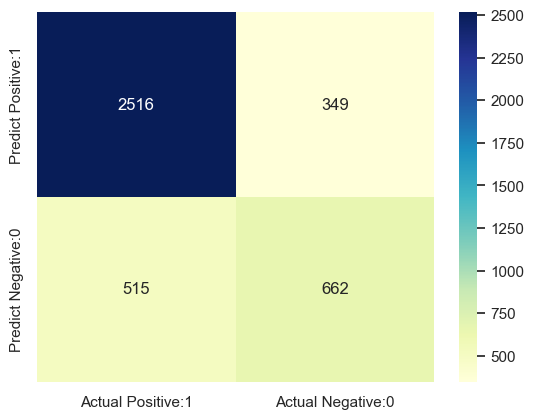

In [67]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices 

## Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2865
           1       0.65      0.56      0.61      1177

    accuracy                           0.79      4042
   macro avg       0.74      0.72      0.73      4042
weighted avg       0.78      0.79      0.78      4042



In [69]:
# Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [70]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7862


In [71]:
# Classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.2138


# Adjusting the threshold level 

In [72]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.89183532, 0.10816468],
       [0.99618278, 0.00381722],
       [0.99698538, 0.00301462],
       [0.82126503, 0.17873497],
       [0.38246519, 0.61753481],
       [0.72275945, 0.27724055],
       [0.273853  , 0.726147  ],
       [0.14582419, 0.85417581],
       [0.51890701, 0.48109299],
       [0.88133627, 0.11866373]])

In [73]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Fraud (0)', 'Prob of - Fraud (1)'])

y_pred_prob_df

,Prob of - No Fraud (0),Prob of - Fraud (1)
0,0.891835,0.108165
1,0.996183,0.003817
2,0.996985,0.003015
3,0.821265,0.178735
4,0.382465,0.617535
5,0.722759,0.277241
6,0.273853,0.726147
7,0.145824,0.854176
8,0.518907,0.481093
9,0.881336,0.118664


In [74]:
# print the first 10 predicted probabilities for class 1 - Probability of Fraud

logreg.predict_proba(X_test)[0:10, 1]

array([0.10816468, 0.00381722, 0.00301462, 0.17873497, 0.61753481,
       0.27724055, 0.726147  , 0.85417581, 0.48109299, 0.11866373])

In [75]:
# store the predicted probabilities for class 1 - Probability of Fraud

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

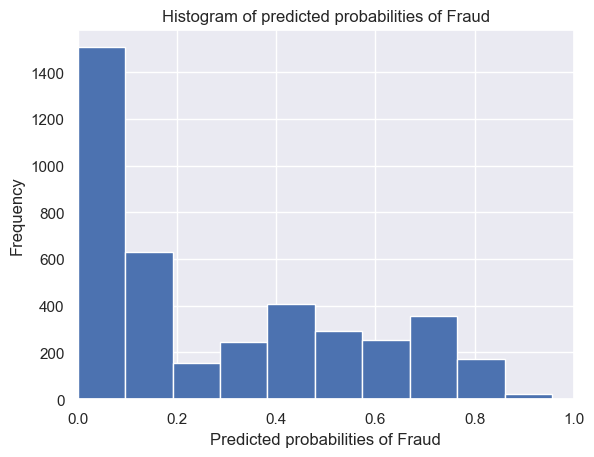

In [76]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Fraud')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Fraud')
plt.ylabel('Frequency')

In [77]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8704


In [78]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8641


# k-Fold Cross Validation ¶


In [79]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79430869 0.78441076 0.79585524 0.79832972 0.80204145]


In [80]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7950


Our, original model score is found to be 0.7865. The average cross-validation score is 0.7963. So, we can conclude that cross-validation does not result in performance improvement.

# Hyperparameter Optimization using GridSearch CV ¶


In [81]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [82]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7957


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, random_state=0, solver='liblinear')


In [83]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.7860
